In [2]:
import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://homes.cs.washington.edu/~hschafer/cse416/a2/home_data.csv',
          'home_data.csv')

In [3]:
# Conventionally people rename these common imports for brevity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Magic command to make the plots appear in-line (it's actually called a "magic command")
%matplotlib inline

In [4]:
sales = pd.read_csv('home_data.csv') 

# Selects 1% of the data
sales = sales.sample(frac=0.01, random_state=0) 

print(f'Number of points: {len(sales)}')
sales.head()

Number of points: 216


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17384,1453602313,20141029T000000,297000,2,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
722,2225059214,20140808T000000,1578000,4,3.25,4670,51836,2.0,0,0,...,12,4670,0,1988,0,98005,47.6350,-122.164,4230,41075
2680,2768000270,20140625T000000,562100,2,0.75,1440,3700,1.0,0,0,...,7,1200,240,1914,0,98107,47.6707,-122.364,1440,4300
18754,6819100040,20140624T000000,631500,2,1.00,1130,2640,1.0,0,0,...,8,1130,0,1927,0,98109,47.6438,-122.357,1680,3200
14554,4027700666,20150426T000000,780000,4,2.50,3180,9603,2.0,0,2,...,9,3180,0,2002,0,98155,47.7717,-122.277,2440,15261


In [5]:
from math import sqrt

# All of the features of interest
features = [
    'bedrooms', 
    'bathrooms',
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'waterfront', 
    'view', 
    'condition', 
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built', 
    'yr_renovated'
]

# Compute the square and sqrt of each feature
all_features = []
for feat in features:
    square_feat = feat + '_square'
    sqrt_feat = feat + '_sqrt'
    
    sales[square_feat] = sales[feat] ** 2
    sales[sqrt_feat] = sales[feat].apply(sqrt)
    
    all_features.extend([feat, square_feat, sqrt_feat])
    
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_square,grade_sqrt,sqft_above_square,sqft_above_sqrt,sqft_basement_square,sqft_basement_sqrt,yr_built_square,yr_built_sqrt,yr_renovated_square,yr_renovated_sqrt
17384,1453602313,20141029T000000,297000,2,1.50,1430,1650,3.0,0,0,...,49,2.645751,2044900,37.815341,0,0.000000,3996001,44.710178,0,0.0
722,2225059214,20140808T000000,1578000,4,3.25,4670,51836,2.0,0,0,...,144,3.464102,21808900,68.337398,0,0.000000,3952144,44.586994,0,0.0
2680,2768000270,20140625T000000,562100,2,0.75,1440,3700,1.0,0,0,...,49,2.645751,1440000,34.641016,57600,15.491933,3663396,43.749286,0,0.0
18754,6819100040,20140624T000000,631500,2,1.00,1130,2640,1.0,0,0,...,64,2.828427,1276900,33.615473,0,0.000000,3713329,43.897608,0,0.0
14554,4027700666,20150426T000000,780000,4,2.50,3180,9603,2.0,0,2,...,81,3.000000,10112400,56.391489,0,0.000000,4008004,44.743715,0,0.0


In [6]:
def standardize(v):
    """
    Takes a single column of a DataFrame and returns a new column 
    with the data standardized (mean 0, std deviation 1)
    """
    std = v.std()
    if std == 0:
        return np.zeros(len(v))
    else:
        return (v - v.mean()) / std

# Standardize each of the features
for feature in all_features:
    sales[feature] = standardize(sales[feature])
    
# Make the price have mean 0 
mean_price = sales['price'].mean() 
sales['price'] -= mean_price

# Preview
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_square,grade_sqrt,sqft_above_square,sqft_above_sqrt,sqft_basement_square,sqft_basement_sqrt,yr_built_square,yr_built_sqrt,yr_renovated_square,yr_renovated_sqrt
17384,1453602313,20141029T000000,-2.494620e+05,-1.732713,-0.850304,-0.750014,-0.388060,2.744430,-0.118403,-0.284816,...,-0.596346,-0.578973,-0.499020,-0.459475,-0.462336,-0.687521,0.887345,0.884234,-0.219776,-0.219813
722,2225059214,20140808T000000,1.031538e+06,0.705502,1.453745,2.818818,1.124834,0.850510,-0.118403,-0.284816,...,4.108393,3.239989,3.985305,2.771992,-0.462336,-0.687521,0.514800,0.519862,-0.219776,-0.219813
2680,2768000270,20140625T000000,1.563804e+04,-1.732713,-1.837753,-0.738999,-0.326261,-1.043409,-0.118403,-0.284816,...,-0.596346,-0.578973,-0.636268,-0.795551,-0.343052,0.511572,-1.937984,-1.958030,-0.219776,-0.219813
18754,6819100040,20140624T000000,8.503804e+04,-1.732713,-1.508604,-1.080461,-0.358216,-1.043409,-0.118403,-0.284816,...,0.146507,0.273513,-0.673274,-0.904128,-0.462336,-0.687521,-1.513825,-1.519301,-0.219776,-0.219813
14554,4027700666,20150426T000000,2.335380e+05,0.705502,0.466296,1.177596,-0.148311,0.850510,-0.118403,2.389978,...,0.988408,1.074185,1.331444,1.507241,-0.462336,-0.687521,0.989306,0.983434,-0.219776,-0.219813


In [161]:
# TODO Fill in the numbers to make datasets of the right size.
from sklearn.model_selection import train_test_split

train_and_validation, test = train_test_split(sales, test_size=0.2, random_state=6)
train, validation = train_test_split(train_and_validation, test_size=1/8, random_state=6)
# print(len(test)) 44
# print(len(train)) 150
# print(len(validation)) 22
# len(sales) 216

In [194]:
# Q1 linear regression
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(train[all_features], train["price"])
pred = model.predict(test[all_features])
y = test["price"]
RMSE = math.sqrt(mean_squared_error(y, pred))
print(RMSE) # RMSE 384955.75299383013

384955.75299383013


In [163]:
# Ridge regression
from sklearn import linear_model
l2 = np.logspace(-5, 5, 11)

ridge = []
test_rmse = []

for i in range(11):
    l2_penalty = l2[i]
    modell = linear_model.Ridge(alpha = l2[i], random_state = 0)
    
    model = modell.fit(train[all_features], train["price"])
    
    train_rmse = math.sqrt(mean_squared_error(train["price"], modell.predict(train[all_features])))
    
    validation_rmse = math.sqrt(mean_squared_error(validation["price"], modell.predict(validation[all_features])))

    test1 = math.sqrt(mean_squared_error(test["price"], modell.predict(test[all_features])))
    test_rmse.append(test1)
    
    ridge.append({'l2_penalty': l2_penalty, 'model': model, 
                       'train_rmse': train_rmse, 'validation_rmse': validation_rmse})
    
ridge_data = pd.DataFrame(ridge)


In [89]:
assert type(ridge_data) == pd.DataFrame
assert len(ridge_data) == 11

for col in ['l2_penalty', 'model', 'train_rmse', 'validation_rmse']:
    assert col in ridge_data.columns, f'Missing column {col}'

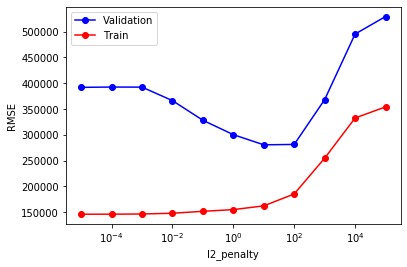

In [90]:
# Plot the validation RMSE as a blue line with dots
plt.plot(ridge_data['l2_penalty'], ridge_data['validation_rmse'], 
         'b-o', label='Validation')
# Plot the train RMSE as a red line dots
plt.plot(ridge_data['l2_penalty'], ridge_data['train_rmse'], 
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l2_penalty')
plt.ylabel('RMSE')
plt.legend()

In [91]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(model.coef_, features))
    print(*feats, sep = "\n")

In [203]:
# best l2 penalty
print(ridge_data.head(11))
index = ridge_data['validation_rmse'].idxmin()
row = ridge_data.loc[index]
print('l2 penalty: ' + str(row['l2_penalty']))
#print_coefficients(row['model'], all_features)
# test RMSE
l2 = 10
best_model = linear_model.Ridge(alpha = l2, random_state = 0)
best = best_model.fit(train[all_features], train['price'])
testerr = math.sqrt(mean_squared_error(test["price"], best.predict(test[all_features])))
testerr
#test_rmse[6] # 350668.1832412408

      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

       train_rmse  validation_rmse  
0   146189.482787    392113.886094  
1   146212.364397    392713.488968  
2   146628.698076    392554.480303  

350668.1832412408

In [180]:
# Lasso
from sklearn.linear_model import Lasso

l1 = np.logspace(1, 7, num = 7)
lasso = []
test2 = []

for i in range(7):
    l1_penalty = l1[i]
    
    model = Lasso(alpha = l1[i], random_state = 0).fit(train[all_features], train["price"])
    
    train_rmse = math.sqrt(mean_squared_error(train['price'], model.predict(train[all_features])))
    
    validation_rmse = math.sqrt(mean_squared_error(validation['price'], model.predict(validation[all_features])))
    
    test_rmse = math.sqrt(mean_squared_error(test['price'], model.predict(test[all_features])))
    test2.append(test_rmse)
    
    lasso.append({'l1_penalty': l1_penalty, 'model': model, 
                       'train_rmse': train_rmse, 'validation_rmse': validation_rmse})
    
lasso_data = pd.DataFrame(lasso)

C:\Users\cuijy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1649508920297.8142, tolerance: 1912867203.405283
  positive)
C:\Users\cuijy\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 959552311817.7595, tolerance: 1912867203.405283
  positive)


In [181]:
assert type(lasso_data) == pd.DataFrame
assert len(lasso_data) == 7

for col in ['l1_penalty', 'model', 'train_rmse', 'validation_rmse']:
    assert col in lasso_data.columns, f'Missing column {col}'

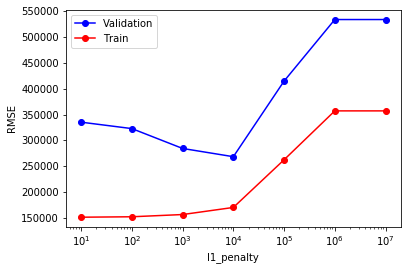

In [182]:
# Plot the validation RMSE as a blue line with dots

plt.plot(lasso_data['l1_penalty'], lasso_data['validation_rmse'],
         'b-o', label='Validation')

# Plot the train RMSE as a red line dots
plt.plot(lasso_data['l1_penalty'], lasso_data['train_rmse'],
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l1_penalty')
plt.ylabel('RMSE')
plt.legend()

In [193]:
# best l1 penalty
print(lasso_data.head(7))
index = lasso_data['validation_rmse'].idxmin()
print(index)
row = lasso_data.loc[index]
print('l1 penalty: ' + str(row['l1_penalty']))
print_coefficients(row['model'], all_features)
# test RMSE
test2[index] # 341484.0599829633

   l1_penalty                                              model  \
0        10.0  Lasso(alpha=10.0, copy_X=True, fit_intercept=T...   
1       100.0  Lasso(alpha=100.0, copy_X=True, fit_intercept=...   
2      1000.0  Lasso(alpha=1000.0, copy_X=True, fit_intercept...   
3     10000.0  Lasso(alpha=10000.0, copy_X=True, fit_intercep...   
4    100000.0  Lasso(alpha=100000.0, copy_X=True, fit_interce...   
5   1000000.0  Lasso(alpha=1000000.0, copy_X=True, fit_interc...   
6  10000000.0  Lasso(alpha=10000000.0, copy_X=True, fit_inter...   

      train_rmse  validation_rmse  
0  151342.180884    335241.388585  
1  152194.025911    322816.843560  
2  156518.588018    284368.235272  
3  170238.979692    268444.047540  
4  262480.902123    414751.280563  
5  357105.698956    533861.713077  
6  357105.698956    533861.713077  
3
l1 penalty: 10000.0
(-0.0, 'bedrooms')
(-0.0, 'bedrooms_square')
(-19129.613383175518, 'bedrooms_sqrt')
(-0.0, 'bathrooms')
(113626.05363381625, 'bathrooms_square')


341484.0599829633